## Realizando a extração dos dados no dataset que estão no formato .rar 

In [1]:
import subprocess

# Caminho para o arquivo .rar no Google Drive
rar_path = '/content/drive/MyDrive/dataset.rar'

# Caminho para a pasta de destino para extrair o conteúdo do arquivo .rar
extract_path = '/content/zip_extract'

# Comando unrar para extrair o arquivo .rar
command = f'unrar x "{rar_path}" "{extract_path}"'

# Executar o comando unrar como um processo externo
subprocess.call(command, shell=True)


0

## Realizando a clonagem do repositorio que contem o código da Yolo

In [2]:
%%bash
git clone https://github.com/ultralytics/yolov5  # clone
cd yolov5
pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


Cloning into 'yolov5'...


## Analisando quantos cores tem a máquina que está sendo usada para treinar o modelo. Essa informação será util futuramente

In [3]:
import multiprocessing

num_cpus = multiprocessing.cpu_count()
print("Número de CPUs:", num_cpus)


Número de CPUs: 2


## Criando um arquivo VOC.yaml para ajustarmos os dados para treinamento 

In [4]:
%%bash
cp yolov5/data/VOC.yaml yolov5/VOC.yaml

Modelo de arquivo VOC.yaml

path: path
train: 
  - images 
val:
  - images

names: 
  0: trafficlight
  1: speedlimit
  2: crosswalk
  3: stop

## Realizando o treinamento do modelo em nossa base de dados. Como estamos no colab, o código de treinamento abaixo está escrito para que os logs sejam mostrados na celula do notebook 

In [5]:
import os
import subprocess

os.chdir('/content/yolov5')  # Navegar para o diretório do YOLOv5

command = 'python train.py --img 320 --batch 64 --epochs 50 --data VOC.yaml --weights yolov5s.pt'

process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

# Ler e exibir a saída em tempo real
while True:
    output = process.stdout.readline()
    if output == b'' and process.poll() is not None:
        break
    if output:
        print(output.decode('utf-8').strip())

# Obter o código de retorno do processo
return_code = process.poll()
print('Código de retorno:', return_code)


train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

## Carregando modelo

In [13]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-5 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Utilizando o modelo com outras images que não estavam presentes em nossa base de dados que foi utilizada para treinamento da rede. Para testar uma imagem em específico, basta colocar o link da imagem na lista de urls

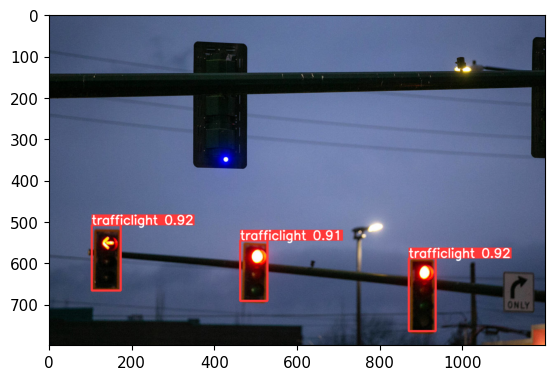

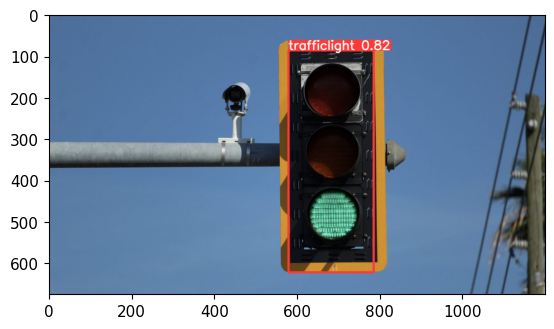

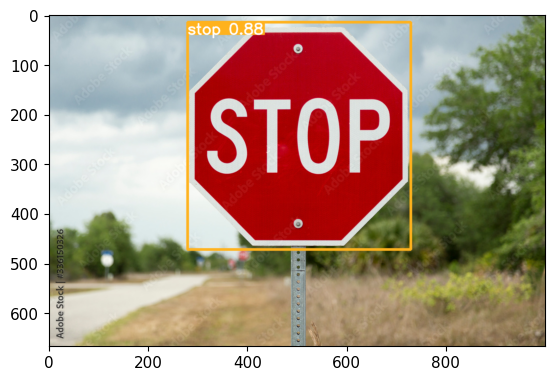

In [99]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# URL das imagens que você deseja baixar
urls = [
    "https://www.heraldnet.com/wp-content/uploads/2022/12/31272559_web1_L1-TrafficLight-EDH-221211-FS-1200x799.jpg",
    "https://nutritionfacts.org/app/uploads/2021/11/5-1-1200x675.jpeg",
    "https://as2.ftcdn.net/v2/jpg/03/36/15/03/1000_F_336150326_pSJoKBKiaXxKLbJbCMgsvNBLCSULQb65.jpg"
    # Adicione mais URLs de imagens, se desejar
]

for url in urls:
    # Faz a solicitação HTTP para obter o conteúdo da imagem
    response = requests.get(url)

    # Verifica se a solicitação foi bem-sucedida
    if response.status_code == 200:
        # Lê o conteúdo da imagem a partir do objeto de resposta
        image_content = response.content

        # Cria um objeto de imagem a partir do conteúdo
        image = Image.open(BytesIO(image_content))

        # Faz algo com a imagem, como passar para o modelo
        results = model(image)

        # Exibe a imagem
        plt.imshow(np.squeeze(results.render()))
        plt.show()

    else:
        print("Falha ao carregar a imagem.")
